# Analyze smoothing filters with scipy and pandas.

#### Generate a signal with some noise

In [2]:
import numpy as np
np.random.seed(0)
t = np.linspace(0, 5, 100)
x = np.sin(t) + .1 * np.random.normal(size=100)

#### Apply moving averge filters

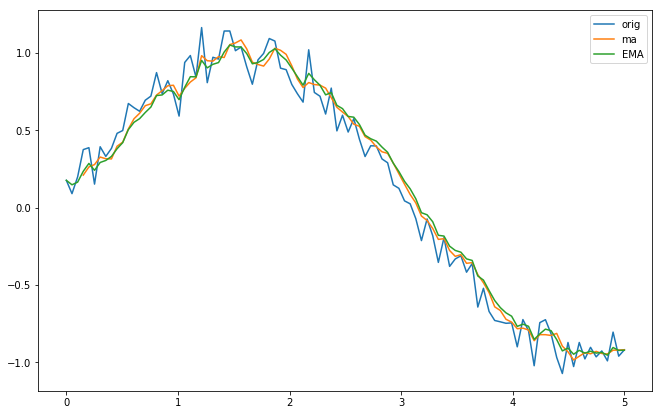

In [4]:
import pandas as pd

df = pd.DataFrame(x, index=t,columns=['orig'])
df['ma'] = df['orig'].rolling(window=4).mean()
df['EMA'] = df['orig'].ewm(span=5,adjust=False).mean()
df.plot(figsize=(11,7))

#### Apply a variety of turn-key filters to it, and plot the result

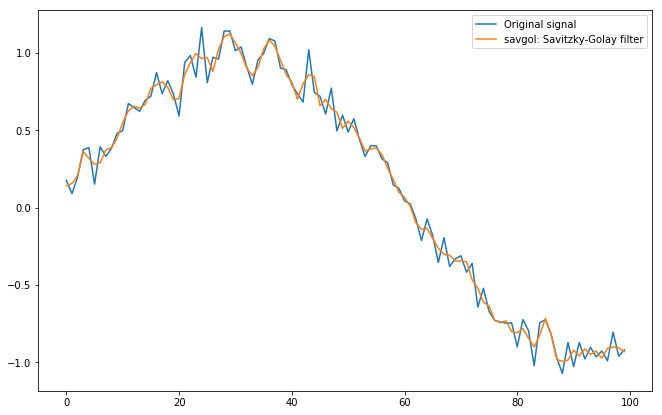

In [6]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(11, 7))
plt.plot(x, label='Original signal')

plt.plot(signal.savgol_filter(x,5,2), label='savgol: Savitzky-Golay filter')
#plt.plot(signal.medfilt(x), label='medfilt: median filter')
#plt.plot(signal.wiener(x), label='wiener: wiener filter')
plt.legend(loc='best')

# Analyze smoothing with another set of data

In [7]:
path = 'data/timeseries.csv'
df = pd.read_csv(path, delimiter='\t',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.376936,1.224864,0.343874,0.328454,-0.337609,1.026514,-1.330996,-0.657800,1.446077,-0.846397,...,-1.568165,1.021863,-1.429748,1.356966,1.372781,0.663558,0.918346,-1.311742,-1.197146,1
1,0.644406,0.413269,-0.862278,-1.497386,-0.421458,-0.214215,-1.292131,0.956898,-1.216140,-0.588536,...,-0.802528,-1.121287,0.989319,-1.109687,0.219856,0.630034,1.398140,0.085742,0.024997,1
2,-0.978667,-0.406232,0.822429,-1.408242,-1.676734,-0.490632,1.404598,1.168600,-1.703254,0.972810,...,-0.762884,1.382972,-0.869103,1.277252,-0.198967,0.966809,0.666129,0.106996,0.082715,1
3,-0.236537,-0.098175,0.367092,1.366860,0.498281,-0.300223,1.715634,0.902108,-0.218132,-1.430721,...,-1.499604,0.406744,1.289153,-1.119731,-0.995985,1.651135,-1.187098,0.025463,-0.841518,1
4,1.490735,1.325243,1.626829,-0.317056,-1.098990,-0.022213,0.596980,1.667339,-0.206153,-1.376627,...,1.029995,-1.496161,-1.167442,1.484208,-0.373020,-0.843281,-0.209794,0.137724,0.716542,1


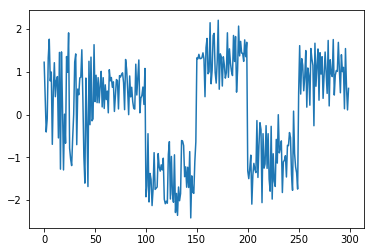

In [8]:
df.iloc[:,1].plot()

#### DO YOURSELF!!
#### Con esta señal (otra de tu elección) implementa y visualiza los tres filtros anteriores: MA, SMA y SG
#### En scipy.signal hay muchos más, alternativamente analiza y prueba "medfilt","wiener"...
https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html

# Reducción dimensional (PCA)
#### Reduce el espacio dimensional de los datos a 2 componentes y visualiza el resultado con un scatter plot y el histograma de las dos componentes. Extrae la varianza explicada "explained_variance_ratio_"

#### Normaliza los datos con MinMax, Standard y Robust
#### Vuelve a realizar el PCA para cada normalización, sale lo mismo?

# Recursive feature elimination
#### Trabaja este paradigma con estos datos usando como variable dependiente la última columna, ¿cuántas features elimina?

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



# Correlación de Pearson
#### Crea el mapa de correlaciones